<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/3_exercicio_frequencias_medidas/exercicio_frequencias_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Frequências e Medidas

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dado

In [ ]:
df = pd.read_json('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Estatística/enem_2023.json')

In [ ]:
df.sample(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
21,NaN,484.955831,552.413593,720.071237,742.464257,Não idenficado
627,341.938033,566.435776,NaN,517.493951,NaN,Homem
500,540.616120,660.750863,514.522411,574.517081,702.825825,Mulher
346,465.160631,527.011022,NaN,664.468929,611.232129,Mulher
857,447.274834,430.690342,570.315045,628.889162,510.388730,Homem


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


## Questões

### 1.
Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
df_numeric = df.select_dtypes(include="number")

df_amplitude = pd.DataFrame({
    "Max": df_numeric.max(),
    "Min": df_numeric.min()
})

df_amplitude['Amplitude'] = df_amplitude['Max'] - df_amplitude['Min']

df_amplitude

,Max,Min,Amplitude
Linguagens,804.456317,287.000000,517.456317
Ciências humanas,763.919695,289.900000,474.019695
Ciências da natureza,802.004568,314.400000,487.604568
Matemática,807.877902,319.800000,488.077902
Redação,1000.000000,270.839965,729.160035


In [ ]:
print(f"A matéria com maior amplitude é {df_amplitude['Amplitude'].idxmax()} com {round(df_amplitude['Amplitude'].max(), 2)} de amplitude.")


A matéria com maior amplitude é Redação com 729.16 de amplitude.


### 2.
Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
df_stats = pd.DataFrame({
    "Média": df_numeric.mean(),
    "Mediana": df_numeric.median()
})

df_stats

,Média,Mediana
Linguagens,514.524809,515.045250
Ciências humanas,527.042281,524.519920
Ciências da natureza,499.315583,500.479263
Matemática,535.965660,533.247767
Redação,637.783532,635.273973


### 3.
Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
multiplicadores = {
    "Redação": 2,
    "Matemática": 4,
    "Linguagens": 2,
    "Ciências humanas": 1,
    "Ciências da natureza": 1
}

df_ponderado = df_numeric.mul(multiplicadores)
df_ponderado.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412
1,718.769216,642.084134,NaN,1648.820827,1483.650511
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501
3,700.329209,602.041588,413.979810,2706.435806,1342.474229
4,768.187315,489.249140,609.758123,2081.706791,1488.750095


In [ ]:
df_ponderado['total'] = df_ponderado.sum(axis=1)
df_ponderado.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,total
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,5150.201992
1,718.769216,642.084134,NaN,1648.820827,1483.650511,4493.324688
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,6231.924171
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,5765.260643
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,5437.651463


In [ ]:
df_top_500 = df_ponderado.sort_values(by='total', ascending=False).head(500)

df_top_500_stats = pd.DataFrame({
    "Média": df_top_500.mean(),
    "Desvio padrão": df_top_500.std()
})

df_top_500_stats

,Média,Desvio padrão
Linguagens,1054.081454,165.735885
Ciências humanas,531.746811,78.238550
Ciências da natureza,506.462716,77.555403
Matemática,2258.460105,311.246084
Redação,1339.622430,218.690495
total,5618.791065,359.942664


### 4.
Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
df_top_40 = df_ponderado.sort_values(by='total', ascending=False).head(40)

df_top_40_stats = pd.DataFrame({
    "Média": df_top_40.mean(),
    "Variância": df_top_40.var()
})

df_top_40_stats

,Média,Variância
Linguagens,1172.553211,42142.668819
Ciências humanas,554.327484,6410.724088
Ciências da natureza,522.298209,5179.612094
Matemática,2622.603326,102389.201714
Redação,1495.045186,44121.112431
total,6366.827415,29576.750360


### 5.
Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
df[['Matemática', 'Linguagens']].quantile(0.75)

,0.75
Matemática,592.912963
Linguagens,571.635876


### 6.
Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

<Axes: ylabel='Frequency'>

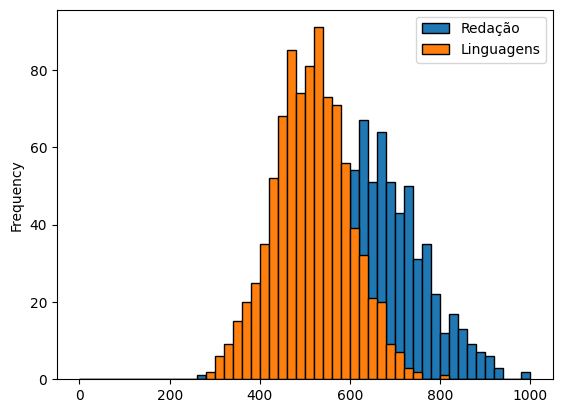

In [ ]:
max_value = int(np.ceil(df[['Redação', 'Linguagens']].max().max()))  # Arredonda para cima e converte para inteiro
bins = range(0, max_value + 20, 20)  # Define os intervalos de 20 em 20

df[['Redação', 'Linguagens']].plot(kind='hist', bins=bins, edgecolor='black')


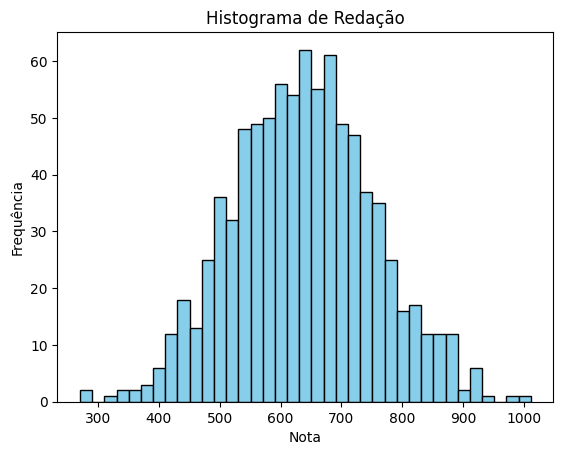

In [ ]:
# definir os limites dos bins
min_value = df['Redação'].min()
max_value = df['Redação'].max()

# bins de 20 em 20
bins = np.arange(min_value, max_value + 20, 20)

df['Redação'].plot(kind='hist', bins=bins, edgecolor='black', color='skyblue')

plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


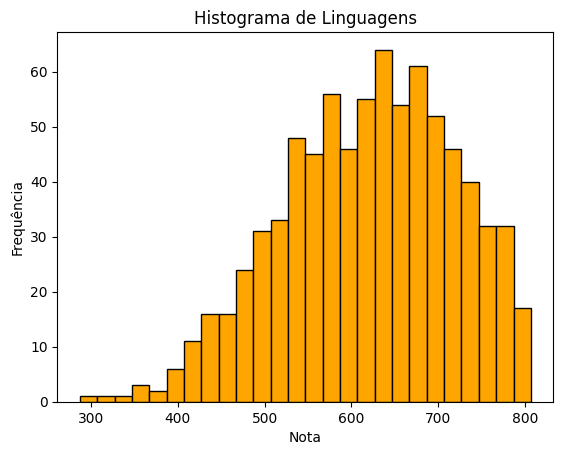

In [ ]:
# definir os limites dos bins
min_value = df['Linguagens'].min()
max_value = df['Linguagens'].max()

# bins de 20 em 20
bins = np.arange(min_value, max_value + 20, 20)

df['Redação'].plot(kind='hist', bins=bins, edgecolor='black', color='orange')

plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

O histograma da Redação é mais simétrico, enquanto o histograma de Linguagens apresenta assimetria à esquerda.

### 7.
Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria?

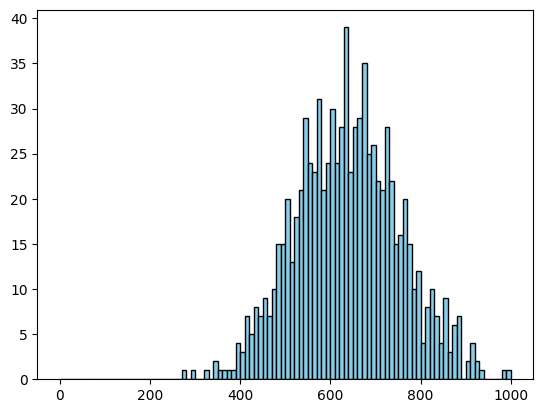

In [ ]:
plt.hist(df['Redação'], bins=100, range=[0, 1000], edgecolor='black', color='skyblue')
plt.show()

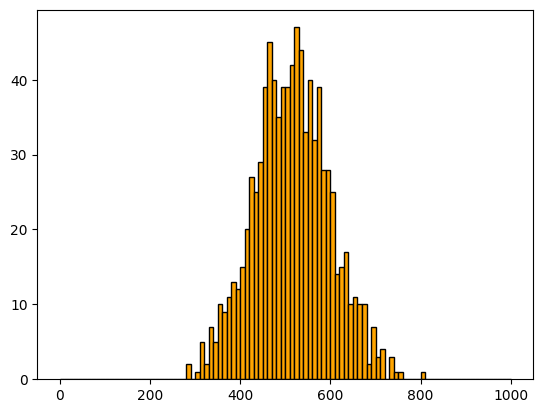

In [ ]:
plt.hist(df['Linguagens'], bins=100, range=[0, 1000], edgecolor='black', color='orange')
plt.show()

Fixando o range de 0 a 1000 a simetria de Linguagens alterou-se.

### 8.
Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o método IQR (Intervalo Interquartílico) para essa análise.

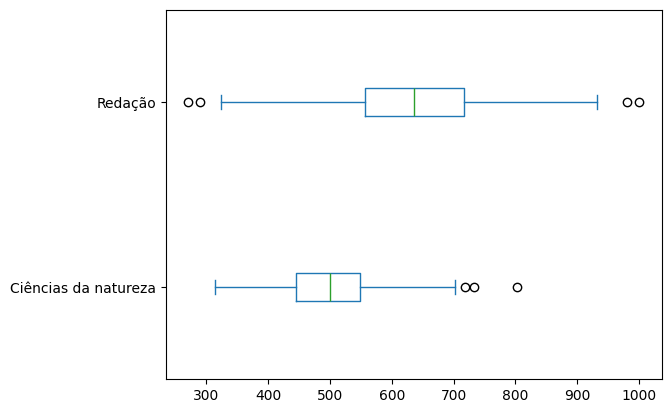

In [ ]:
df[['Ciências da natureza', 'Redação']].plot(kind='box', vert=False)
plt.show()


In [ ]:
df[['Ciências da natureza', 'Redação']].describe()

,Ciências da natureza,Redação
count,824.000000,860.000000
mean,499.315583,637.783532
std,78.760404,115.339972
min,314.400000,270.839965
25%,444.709076,556.468366
50%,500.479263,635.273973
75%,548.751678,715.989868
max,802.004568,1000.000000


### 9.
Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# identificar outliers e remover usando IQR
Q1 = df[['Ciências da natureza', 'Redação']].quantile(0.25)
Q3 = df[['Ciências da natureza', 'Redação']].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_sem_outliers = df[~((df[['Ciências da natureza', 'Redação']] < limite_inferior) |
                       (df[['Ciências da natureza', 'Redação']] > limite_superior)).any(axis=1)]

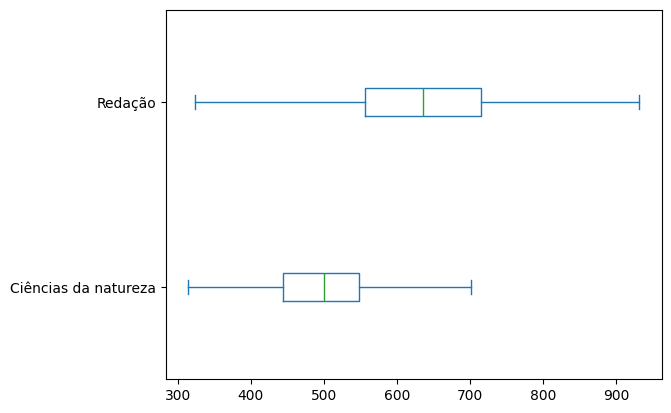

In [ ]:
df_sem_outliers[['Ciências da natureza', 'Redação']].plot(kind='box', vert=False)
plt.show()

In [ ]:
df_sem_outliers[['Ciências da natureza', 'Redação']].describe()

,Ciências da natureza,Redação
count,819.000000,854.000000
mean,498.171365,637.630494
std,77.336511,112.993874
min,314.400000,324.222553
25%,444.638044,556.694263
50%,499.865167,635.273973
75%,547.973155,715.277004
max,701.813052,931.305275


As médias de Ciências da Natureza e Redação não foram alteradas significativamente.

### 10.
Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Substituir valores nulos por média, moda e mediana, e comparar impacto

# Calcular média, moda e mediana
media = df[['Ciências da Natureza', 'Redação']].mean()
moda = df[['Ciências da Natureza', 'Redação']].mode().iloc[0]
mediana = df[['Ciências da Natureza', 'Redação']].median()

# Função para substituir valores nulos
def substituir_nulos(df, substituicao):
    return df.fillna(substituicao)

# Calcular a média e desvio padrão originais
media_original = df[['Ciências da Natureza', 'Redação']].mean()
desvio_padrao_original = df[['Ciências da Natureza', 'Redação']].std()

# Substituir valores nulos por cada medida e calcular novas médias e desvios padrão
df_media_substituida = substituir_nulos(df, media)
df_moda_substituida = substituir_nulos(df, moda)
df_mediana_substituida = substituir_nulos(df, mediana)

# Calcular média e desvio padrão após as substituições
media_media_substituida = df_media_substituida[['Ciências da Natureza', 'Redação']].mean()
desvio_padrao_media_substituida = df_media_substituida[['Ciências da Natureza', 'Redação']].std()

media_moda_substituida = df_moda_substituida[['Ciências da Natureza', 'Redação']].mean()
desvio_padrao_moda_substituida = df_moda_substituida[['Ciências da Natureza', 'Redação']].std()

media_mediana_substituida = df_mediana_substituida[['Ciências da Natureza', 'Redação']].mean()
desvio_padrao_mediana_substituida = df_mediana_substituida[['Ciências da Natureza', 'Redação']].std()

# Calcular a diferença em relação à média e ao desvio padrão
diferenca_media = {
    'Média': (media_original - media_media_substituida).abs(),
    'Moda': (media_original - media_moda_substituida).abs(),
    'Mediana': (media_original - media_mediana_substituida).abs()
}

diferenca_desvio_padrao = {
    'Média': (desvio_padrao_original - desvio_padrao_media_substituida).abs(),
    'Moda': (desvio_padrao_original - desvio_padrao_moda_substituida).abs(),
    'Mediana': (desvio_padrao_original - desvio_padrao_mediana_substituida).abs()
}

# Exibir os resultados
print(f"Diferença na média após substituição:")
print(diferenca_media)
print(f"\nDiferença no desvio padrão após substituição:")
print(diferenca_desvio_padrao)

# Verificar qual substituição altera menos a média e o desvio padrão
melhor_substituicao_media = min(diferenca_media, key=diferenca_media.get)
melhor_substituicao_desvio_padrao = min(diferenca_desvio_padrao, key=diferenca_desvio_padrao.get)

print(f"\nA melhor medida para substituir os valores nulos com menor alteração na média é: {melhor_substituicao_media}")
print(f"A melhor medida para substituir os valores nulos com menor alteração no desvio padrão é: {melhor_substituicao_desvio_padrao}")
